In [2]:
#import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
#import xarray as xr
import numpy as np
from cartopy.util import add_cyclic_point

In [4]:
filein = open ('PAIC/dadosiri/NovIC_nmme_precip_anom_stdanom.dat', 'rb')

data = np.fromfile(filein,dtype=np.float32).reshape((360,181,6,4))

In [5]:
data

array([[[[-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08]],

        [[-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.99000000e+08, -9.99000000e+08, -9.99000000e+08,
          -9.99000000e+08],
         [-9.990000

In [49]:
#print(len(data[:,0,0,0]))

# file

#lon = data[:,0,0,0]
#lat = data[0,:,0,0]
pr = data[:,:,:,0]

lon = np.arange(360.0)
lat = np
print(lat)

#xcellsize =  (maxlon -  minlon) / ncols
#ycellsize =  (maxlat -  minlat) / nrows

#lat = file['lat'][:]
#lon = file['lon'][:]
#sst = file['pr'][:,:,:]

(array([-90.        , -84.46938776, -78.93877551, -73.40816327,
       -67.87755102, -62.34693878, -56.81632653, -51.28571429,
       -45.75510204, -40.2244898 , -34.69387755, -29.16326531,
       -23.63265306, -18.10204082, -12.57142857,  -7.04081633,
        -1.51020408,   4.02040816,   9.55102041,  15.08163265,
        20.6122449 ,  26.14285714,  31.67346939,  37.20408163,
        42.73469388,  48.26530612,  53.79591837,  59.32653061,
        64.85714286,  70.3877551 ,  75.91836735,  81.44897959,
        86.97959184,  92.51020408,  98.04081633, 103.57142857,
       109.10204082, 114.63265306, 120.16326531, 125.69387755,
       131.2244898 , 136.75510204, 142.28571429, 147.81632653,
       153.34693878, 158.87755102, 164.40816327, 169.93877551,
       175.46938776, 181.        ]), 5.530612244897959)


In [40]:
cpr, clon = add_cyclic_point(pr, coord=lon, axis=0)
print(cpr.shape)

(361, 181, 6)


TypeError: Input z must be a 2D array.

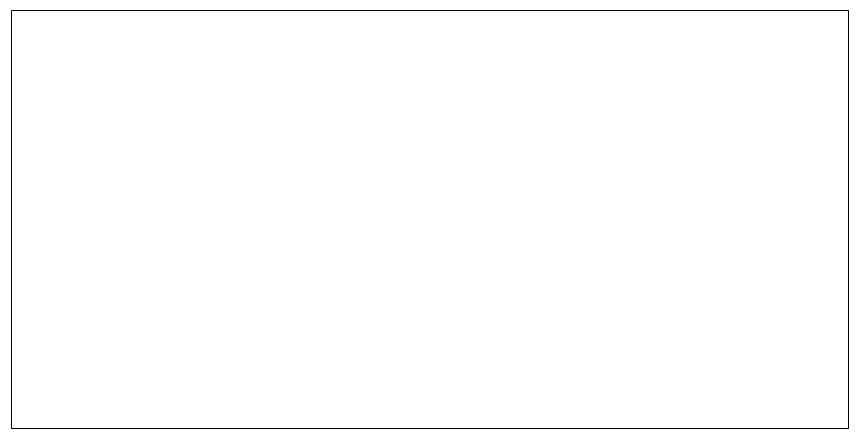

In [37]:
fig = plt.figure(figsize=(15,10))

#interval = np.arange(0,5.25,0.25)

ax = fig.add_subplot(111)

ax = plt.axes(projection=ccrs.PlateCarree())

# ax.contourf(lon, lat, sst, 60,
#              transform=ccrs.PlateCarree(), cmap = plt.get_cmap('Accent'),extend='max')

contour = ax.contourf(clon, lat, np.mean(csst*24*60*60,axis=0), levels = np.arange(0,20,2) ,
              transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Blues'), extend='both')
fig.colorbar(contour, shrink = 0.6, orientation = 'horizontal')

# ax.coastlines()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
# CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
# OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
# Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd,
# PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r,
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,
# Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
# YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone,
# bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
# copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
# gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
# nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
# seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, 
# tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r